In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [49]:
df = pd.read_csv('lr_case_study.csv')
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.shape

(15992, 9)

In [5]:
df.groupby(['Age','Eduacation','Hisp'])['Earnings_1978'].mean()

Age  Eduacation          Hisp       
16   LessThanHighSchool  NotHispanic     6078.940772
                         hispanic        5908.308955
17   HighSchool          NotHispanic     7872.670000
                         hispanic           0.000000
     Intermediate        NotHispanic    10061.838667
     LessThanHighSchool  NotHispanic     7387.540576
                         hispanic        8604.762000
18   HighSchool          NotHispanic     9011.414084
                         hispanic        5053.614250
     Intermediate        NotHispanic     6229.462171
                         hispanic       10508.110000
     LessThanHighSchool  NotHispanic     8051.548338
                         hispanic        5397.396106
19   HighSchool          NotHispanic    11103.439272
                         hispanic       10577.227185
     Intermediate        NotHispanic     7761.493333
                         hispanic        6094.144500
     LessThanHighSchool  NotHispanic     9070.245476
         

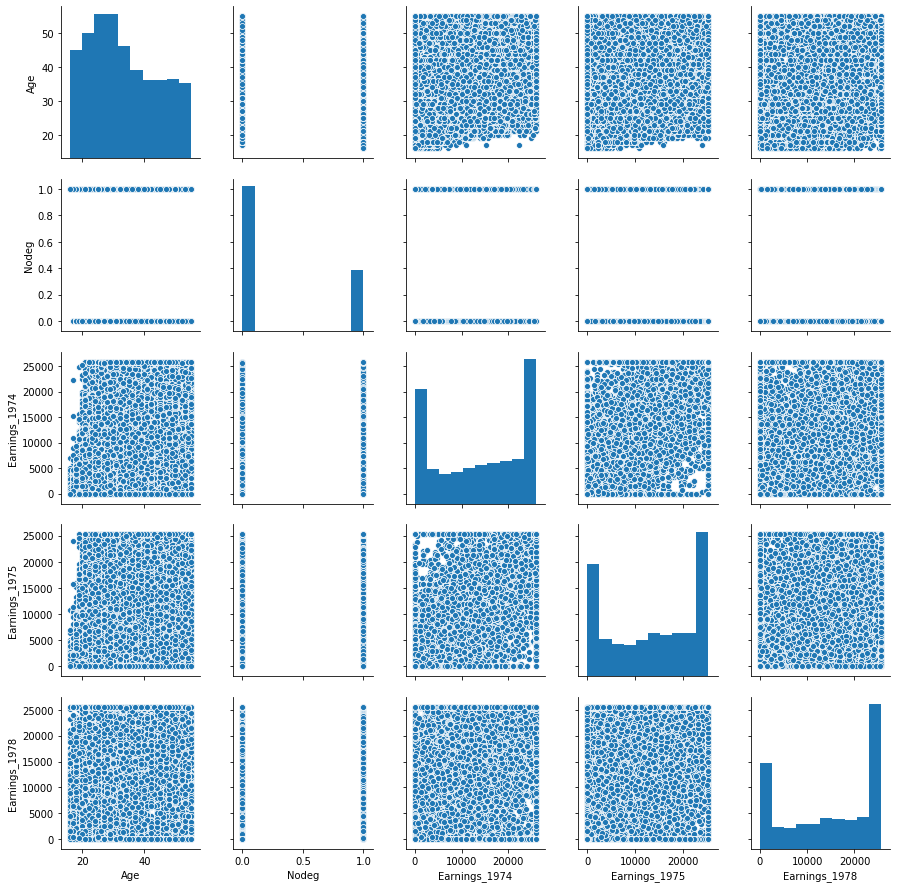

In [6]:
sns.pairplot(df)

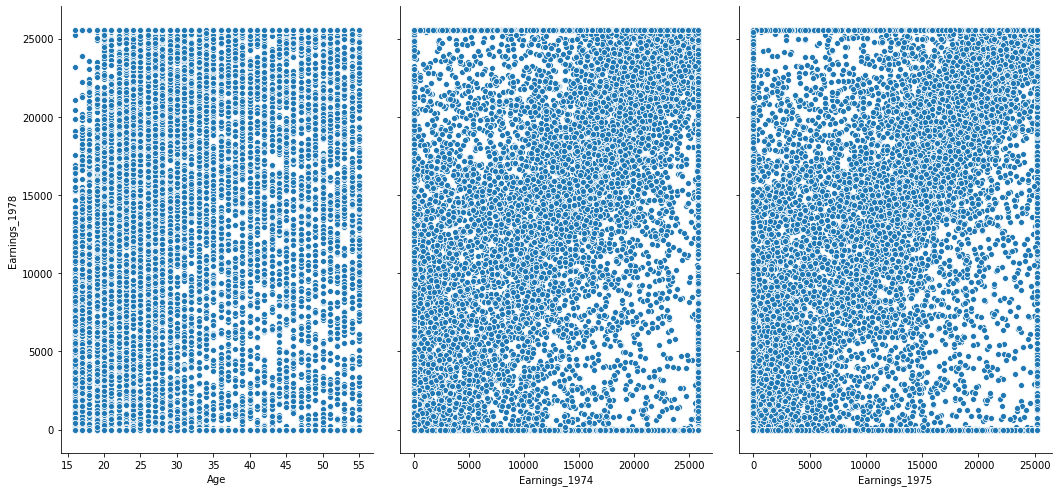

In [7]:
sns.pairplot(df, x_vars = ['Age', 'Earnings_1974','Earnings_1975'], y_vars = 'Earnings_1978', height = 7, aspect = 0.7,kind = 'scatter')

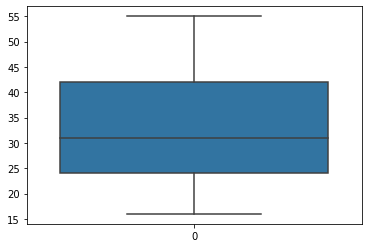

In [8]:
sns.boxplot(data = df['Age'])

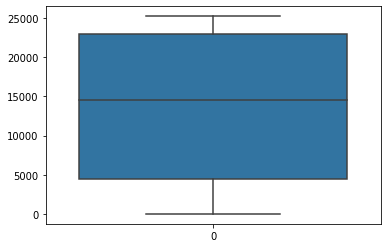

In [9]:
sns.boxplot(data = df['Earnings_1975'])

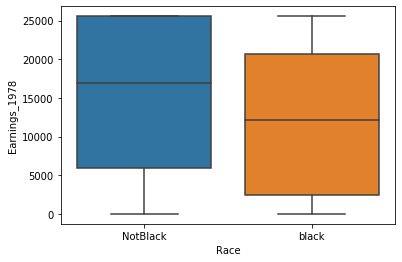

In [10]:
sns.boxplot(x = df['Race'],y=df['Earnings_1978'])

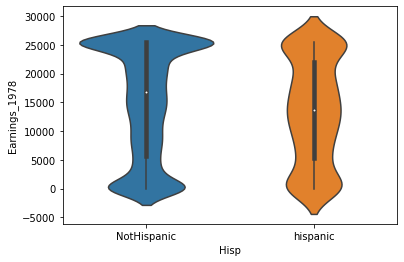

In [11]:
sns.violinplot(x = df['Hisp'], y = df['Earnings_1978'])

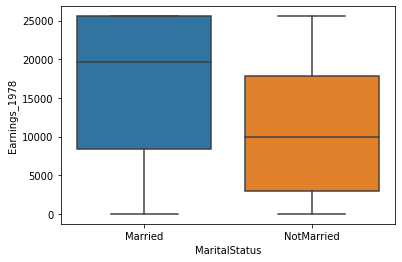

In [12]:
sns.boxplot(x = df['MaritalStatus'], y = df['Earnings_1978'])

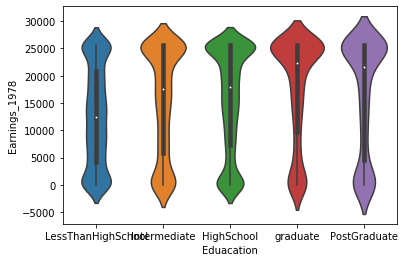

In [13]:
sns.violinplot(x = df['Eduacation'], y = df['Earnings_1978'])

In [54]:
le_education = LabelEncoder()
le_education.fit(df['Eduacation'])
df['Eduacation'] = le_education.transform(df['Eduacation'])

le_race = LabelEncoder()
le_race.fit(df['Race'])
df['Race'] = le_race.transform(df['Race'])

le_hisp = LabelEncoder()
le_hisp.fit(df['Hisp'])
df['Hisp'] = le_hisp.transform(df['Hisp'])

le_marital = LabelEncoder()
le_marital.fit(df['MaritalStatus'])
df['MaritalStatus'] = le_marital.transform(df['MaritalStatus'])

In [55]:
x = df[['Age','Eduacation','Hisp','MaritalStatus','Race','Earnings_1974','Earnings_1975','Nodeg']]
y = df['Earnings_1978']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lr.intercept_)

7917.946570884229


In [60]:
y_pred = lr.predict(x_test)

In [61]:
print('mean square error is: ',mean_squared_error(y_test,y_pred))
print('root mean squared error is: ', sqrt(mean_squared_error(y_test,y_pred)))
print('R_square is: ',r2_score(y_test,y_pred))

mean square error is:  48625781.82278511
root mean squared error is:  6973.218899675036
R_square is:  0.4767134214511375


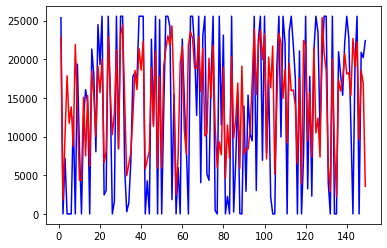

In [47]:
c = [i for i in range(1,150)]
plt.plot(c,y_test[1:150], color = 'blue')
plt.plot(c,y_pred[1:150], color = 'red')
plt.show()

In [39]:
df.tail()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
15987,22,0,1,0,1,0,3975.352,6801.435,2757.438
15988,20,0,1,0,0,0,1445.939,11832.240,6895.072
15989,37,0,0,0,1,0,1733.951,1559.371,4221.865
15990,47,2,0,0,0,1,16914.350,11384.660,13671.930
15991,40,2,0,0,1,1,13628.660,13144.550,7979.724
